#  Kaggle泰坦尼克之灾 

作者： 寒小阳
时间：2015年11月。
出处：http://blog.csdn.net/han_xiaoyang/article/details/49797143
声明：版权所有，转载请注明出处，谢谢。


In [15]:
%matplotlib inline
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("dataset/Train.csv")


In [16]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### 2.1处理姓名
将姓名分割成2 个变量
* fm:family name 
* mname：MS ,MR,master,dr


In [17]:
data_train = pd.read_csv("dataset/Train.csv")
data_test = pd.read_csv("dataset/test.csv")
def changeage():
    if x.mname=='Master':
        return 0
    else:
        return x['ages']
def proc(data):
    data['fname']=data['Name'].apply(lambda x: x.split(',')[0])
    data['mname']=data['Name'].apply(lambda x: x.split(',')[1].split('.')[0])


#data_train.to_csv('traindata1.csv')
    data['ages']=data['Age'].apply(lambda x: x//10)
    data[data['ages']==None ]['ages']=data.apply(lambda x :0   ,axis=1)
    return data

data_train=proc(data_train)
data_test=proc(data_test)
print data_train.fname.head().values
print data_test.fname.head().values


namelist_train=set(data_train.fname.values)
namelist_test=set(data_test.fname.values)
namelist_all=namelist_train.union(namelist_test)
print len(namelist_all),len(namelist_train),len(namelist_test)
name_list={j:i    for i,j in enumerate(namelist_all)}
#print name_list

Ticket_list_train=set(data_train.Ticket.values)
Ticket_list_test=set(data_test.Ticket.values)
Ticket_list_all=Ticket_list_train.union(Ticket_list_test)
print len(Ticket_list_all),len(Ticket_list_train),len(Ticket_list_test)
Ticket_list={j:i    for i,j in enumerate(Ticket_list_all)}

mname_list_train=set(data_train.mname.values)
mname_list_test=set(data_test.mname.values)
mname_list_all=mname_list_train.union(mname_list_test)
print len(mname_list_train),len(mname_list_test),len(mname_list_all)
mname_list={j:i    for i,j in enumerate(mname_list_all)}





def changename(data):
    data['nname']=data['fname'].apply(lambda x: name_list[x] )
    data['nTicket']=data['Ticket'].apply(lambda x: Ticket_list[x] )
    data['mname']=data['mname'].apply(lambda x: mname_list[x] )
    
    
    return data

data_train=changename(data_train)
data_test=changename(data_test)

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = 1
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = 0
    return df
data_train=set_Cabin_type(data_train)
data_test=set_Cabin_type(data_test)


def set_sex_type(df):
    
    df.loc[ (df.Sex=='male' , 'Sex' )] =1
    df.loc[ (df.Sex=='female' , 'Sex' )] =0
    return df
set_sex_type
data_train=set_sex_type(data_train)
data_test=set_sex_type(data_test)

data_train.to_csv('data_train1.csv')
data_test.to_csv('data_test1.csv')
data_train.describe()

['Braund' 'Cumings' 'Heikkinen' 'Futrelle' 'Allen']
['Kelly' 'Wilkes' 'Myles' 'Wirz' 'Hirvonen']
875 667 352
929 681 363
17 9 18


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,mname,ages,nname,nTicket
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,11.589226,2.525210,433.658810,473.795735
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,5.159659,1.497097,248.715419,263.601872
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,11.000000,2.000000,220.500000,247.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,15.000000,2.000000,429.000000,481.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,15.000000,3.000000,643.500000,693.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,17.000000,8.000000,873.000000,927.000000


先从最突出的数据属性开始吧，对，Cabin和Age，有丢失数据实在是对下一步工作影响太大。

先说Cabin，暂时我们就按照刚才说的，按Cabin有无数据，将这个属性处理成Yes和No两种类型吧。

再说Age：

######  2.1缺值补全
通常遇到缺值的情况，我们会有几种常见的处理方式
> * 如果缺值的样本**占总数比例极高**，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
> * 如果缺值的样本**适中**，而该属性**非连续值**特征属性(比如说类目属性)，那就把**NaN作为一个新类别**，加到类别特征中
> * 如果缺值的样本**适中**，而该属性为**连续值**特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它**离散化**，之后把**NaN作为一个type**加到属性类目中。
> * 有些情况下，缺失的值个数并**不是特别多**，那我们也可以试着根据已有的值，**拟合**一下数据，补充上。


本例中，后两种处理方式应该都是可行的，我们先试试***拟合补全***吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据(注：RandomForest是一个用在原始数据中做不同采样，建立多颗DecisionTree，再进行average等等来降低过拟合现象，提高结果的机器学习算法，我们之后会介绍到)

采用贝叶斯模型，补全年龄
取用特征 mname，fname，Pclass，tickiet，Fare 
no 

第一步分割数据，trianset ，pridictset
第二步，? 要不要交叉验证
第三步  预测

In [18]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

def set_missing_ages(df):
    

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['ages','Fare', 'Parch', 'SibSp', 'Pclass','nname','nTicket']]
    

    # 乘客分成已知年龄和未知年龄两部分
    known_ages = age_df[age_df.ages.notnull()].as_matrix()
    unknown_ages = age_df[age_df.ages.isnull()].as_matrix()
    
    
    

    # y即目标年龄
    y = known_ages[:, 0]
    

    # X即特征属性值
    X = known_ages[:, 1:]

    
    gnb.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    
    predictedAges = gnb.predict(unknown_ages[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.ages.isnull()), 'ages' ] = predictedAges 

    return df

data_train=set_missing_ages(data_train)
data_train.head()
data_train.to_csv('traindata1gnb.csv')
data_test.describe()
data_test=set_missing_ages(data_test)
data_test.head()
data_test.to_csv('testdata1gnb.csv')

In [19]:
print data_train.info()
print data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
fname          891 non-null object
mname          891 non-null int64
ages           891 non-null float64
nname          891 non-null int64
nTicket        891 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 104.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

恩。目的达到，OK了。

###### 2.2特征因子化
因为逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的因子化
举个例子：

以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,’no’]，而将其平展开为’Cabin_yes’,’Cabin_no’两个属性

> * 原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0
> * 原本Cabin取值为no的，在此处的”Cabin_yes”下取值为0，在”Cabin_no”下取值为1

我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上，如下所示。

In [20]:
def dummiess(data):
   

    dummies_Embarked = pd.get_dummies(data['Embarked'], prefix= 'Embarked')

    

    dummies_Pclass = pd.get_dummies(data['Pclass'], prefix= 'Pclass')
    

    df = pd.concat([data, dummies_Embarked, dummies_Pclass], axis=1)
    df.drop(['Pclass', 'Name', 'Ticket', 'Embarked','Age','fname',], axis=1, inplace=True)
    return df
data_train=dummiess(data_train)
data_test=dummiess(data_test)



In [21]:
data_train.to_csv('traindatadummiess.csv')

data_test.to_csv('testdatadummiess.csv')

In [22]:
print data_test.describe()
print '========================='

print  data_train.describe()

       PassengerId       SibSp       Parch        Fare       mname  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.447368    0.392344   35.590311   11.801435   
std     120.810458    0.896760    0.981429   55.845590    4.953142   
min     892.000000    0.000000    0.000000    0.000000    2.000000   
25%     996.250000    0.000000    0.000000    7.895800   11.000000   
50%    1100.500000    0.000000    0.000000   14.454200   15.000000   
75%    1204.750000    1.000000    0.000000   31.471875   15.000000   
max    1309.000000    8.000000    9.000000  512.329200   17.000000   

             ages      nname     nTicket  Embarked_C  Embarked_Q  Embarked_S  \
count  418.000000  418.00000  418.000000  418.000000  418.000000  418.000000   
mean     2.456938  435.95933  421.373206    0.244019    0.110048    0.645933   
std      1.340858  253.58870  271.283881    0.430019    0.313324    0.478803   
min      0.000000    0.00000    0.000000    0.000

bingo，我们很成功地把这些类目属性全都转成0，1的数值属性了。
这样，看起来，是不是我们需要的属性值都有了，且它们都是数值型属性呢。

###### 2.3    [scaling] 将一些变化幅度较大的特征化到[-1,1]之内。

In [23]:

import sklearn.preprocessing as preprocessing
def datascaling(df):

    scaler = preprocessing.StandardScaler()
    df_nname=df['nname'].reshape(-1, 1)
    df_Fare=df['Fare'].reshape(-1, 1)  
    df_nTicket=df['nTicket'].reshape(-1, 1)
    df_mname=df['mname'].reshape(-1, 1)
    
    nname_scale_param = scaler.fit(df_nname)
    df['nname_scaled'] = scaler.fit_transform(df_nname, nname_scale_param)
    fare_scale_param = scaler.fit(df_Fare)
    df['Fare_scaled'] = scaler.fit_transform(df_Fare, fare_scale_param)
    nTicket_scale_param = scaler.fit(df_nTicket)
    df['nTicket_scaled'] = scaler.fit_transform(df_nTicket, nTicket_scale_param)
    
    mname_scale_param = scaler.fit(df_mname)
    df['mname_scaled'] = scaler.fit_transform(df_mname, mname_scale_param)
    df.drop(['nname', 'Fare', 'nTicket','mname',], axis=1, inplace=True)
    
    return df
data_train=datascaling(data_train)
data_test=datascaling(data_test)

In [24]:
data_train.to_csv('traindataok.csv')

data_test.to_csv('testdataok.csv')

恩，好看多了，万事俱备，只欠建模。马上就要看到成效了，哈哈。我们把需要的属性值抽出来，转成scikit-learn里面LogisticRegression可以处理的格式

# 3.逻辑回归建模

我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。
#####  Baseline Model -logistic regression

In [25]:
data_train.describe()

,PassengerId,Survived,SibSp,Parch,ages,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,nname_scaled,Fare_scaled,nTicket_scaled,mname_scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,0.523008,0.381594,2.444444,0.188552,0.086420,0.722783,0.242424,0.206510,0.551066,-8.223874e-17,-4.373606e-17,-1.031411e-16,1.467837e-16
std,257.353842,0.486592,1.102743,0.806057,1.435505,0.391372,0.281141,0.447876,0.428790,0.405028,0.497665,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.744574e+00,-6.484217e-01,-1.798401e+00,-2.247384e+00
25%,223.500000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.575203e-01,-4.891482e-01,-8.589576e-01,-1.142627e-01
50%,446.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.874201e-02,-3.573909e-01,2.734545e-02,6.614177e-01
75%,668.500000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.441738e-01,-2.424635e-02,8.339382e-01,6.614177e-01
max,891.000000,1.000000,8.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.767433e+00,9.667167e+00,1.720241e+00,1.049258e+00


In [26]:
from sklearn.svm import SVC

# 用正则取出我们要的属性值
train_df = data_train.filter(regex='Survived|ages|SibSp|Parch|Fare_.*|Cabin|Embarked_.*|Sex|Pclass_.*|mname_.*|nname_.*|nTicket_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y =[int(i) for i in  train_np[:, 0]] 

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = SVC()
clf.fit(X, y)

clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#####  Baseline Model -logistic regression

good，很顺利，我们得到了一个model
先淡定！淡定！你以为把test.csv直接丢进model里就能拿到结果啊…骚年，图样图森破啊！

我们的”test_data”也要做和”train_data”一样的预处理啊！！

不错不错，数据很OK，差最后一步了。
下面就做预测取结果吧！！

# 4.逻辑回归系统优化

###### 4.1 模型系数关联分析

亲，你以为结果提交上了，就完事了？
我不会告诉你，这只是万里长征第一步啊(泪牛满面)！！！这才刚撸完baseline model啊！！！还得优化啊！！！

>我们应该分析分析模型现在的状态了，是过/欠拟合？

>以确定我们需要更多的特征还是更多数据，或者其他操作。

我们有一条很著名的learning curves对吧。

不过在现在的场景下，先不着急做这个事情，我们这个baseline系统还有些粗糙，先再挖掘挖掘。

> * 首先，Name和Ticket两个属性被我们完整舍弃了(好吧，其实是因为这俩属性，几乎每一条记录都是一个完全不同的值，我们并没有找到很直接的处理方式)。

> * 然后，我们想想，年龄的拟合本身也未必是一件非常靠谱的事情，我们依据其余属性，其实并不能很好地拟合预测出未知的年龄。
> * 再一个，以我们的日常经验，小盆友和老人可能得到的照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或者负相关，似乎体现不出两头受照顾的实际情况，所以，说不定我们把年龄离散化，按区段分作类别属性会更合适一些。

把得到的model系数和feature关联起来看看


首先，大家回去前两篇文章里瞄一眼公式就知道，这些系数为正的特征，和最后结果是一个正相关，反之为负相关。

我们先看看那些权重绝对值非常大的feature，在我们的模型上：

> * Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
> * Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
> *  有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
> *   Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
> *   有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
> *  船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)


###### 4.2 交叉验证

重点又来了：

> *  『要做交叉验证(cross validation)!』
> *  『要做交叉验证(cross validation)!』
> *  『要做交叉验证(cross validation)!』

恩，重要的事情说三遍。我们通常情况下，这么做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。

我们用scikit-learn的cross_validation来帮我们完成小数据集上的这个工作。

先简单看看cross validation情况下的打分

等等，既然我们要做交叉验证，那我们干脆先把交叉验证里面的bad case拿出来看看，看看人眼审核，是否能发现什么蛛丝马迹，是我们忽略了哪些信息，使得这些乘客被判定错了。再把bad case上得到的想法和前头系数分析的合在一起，然后逐个试试。

下面我们做数据分割，并且在原始数据集上瞄一眼bad case：

大家可以自己跑一遍试试，拿到bad cases之后，仔细看看。也会有一些猜测和想法。其中会有一部分可能会印证在系数分析部分的猜测，那这些优化的想法优先级可以放高一些。

现在有了”train_df” 和 “vc_df” 两个数据部分，前者用于训练model，后者用于评定和选择模型。可以开始可劲折腾了。

我们随便列一些可能可以做的优化操作：

大家接着往下挖掘，可能还可以想到更多可以细挖的部分。我这里先列这些了，然后我们可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。

试验的过程比较漫长，也需要有耐心，而且我们经常会面临很尴尬的状况，就是我们灵光一闪，想到一个feature，然后坚信它一定有效，结果试验下来，效果还不如试验之前的结果。恩，需要坚持和耐心，以及不断的挖掘。

###### 4.3 learning curves

有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。

从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。

额，这个欠拟合和过拟合怎么解释呢。这么说吧：

    过拟合就像是你班那个学数学比较刻板的同学，老师讲过的题目，一字不漏全记下来了，于是老师再出一样的题目，分分钟精确出结果。but数学考试，因为总是碰到新题目，所以成绩不咋地。
    欠拟合就像是，咳咳，和博主level差不多的差生。连老师讲的练习题也记不住，于是连老师出一样题目复习的周测都做不好，考试更是可想而知了。

而在机器学习的问题上，对于过拟合和欠拟合两种情形。我们优化的方式是不同的。

***对过拟合而言，通常以下策略对结果优化是有用的：***
>做一下feature selection，挑出较好的feature的subset来做training

>提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确

***而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。***

著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态分别如下两张图所示：过拟合(overfitting/high variace)，欠拟合(underfitting/high bias)

<img title="" alt="过拟合" src="http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/high_variance.png?imageView/2/w/400/q/100">
<img title="" alt="欠拟合" src="http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/high_bias.png?imageView/2/w/400/q/100">

我们也可以把错误率替换成准确率(得分)，得到另一种形式的learning curve(sklearn 里面是这么做的)。

回到我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的baseline model的learning curve。

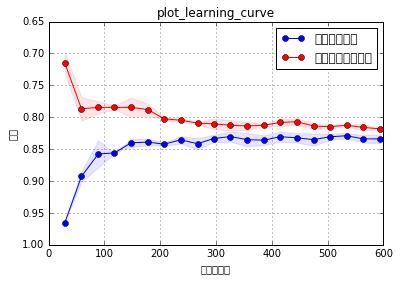

(0.82956504070987003, 0.022766445056103479)

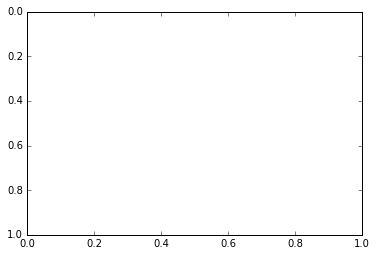

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"plot_learning_curve", X, y)

在实际数据上看，我们得到的learning curve没有理论推导的那么光滑哈，但是可以大致看出来，训练集和交叉验证集上的得分曲线走势还是符合预期的。

目前的曲线看来，我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。

#####  GridSearch

In [28]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':np.linspace(0.1, 10, num=10), 'gamma': np.linspace(0.1, 10, num=10)}
svr = svm.SVC()
clfcv = GridSearchCV(svr, parameters)
clfcv.fit(X, y)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': array([  0.1,   1.2,   2.3,   3.4,   4.5,   5.6,   6.7,   7.8,   8.9,  10. ]), 'gamma': array([  0.1,   1.2,   2.3,   3.4,   4.5,   5.6,   6.7,   7.8,   8.9,  10. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print clfcv.best_estimator_

SVC(C=1.2000000000000002, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


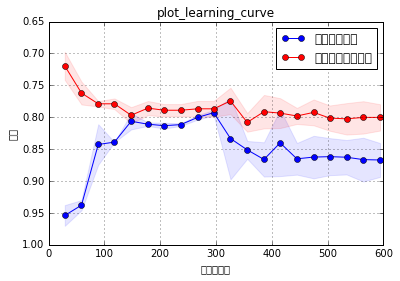

(0.83657069362187397, 0.1139601892883052)

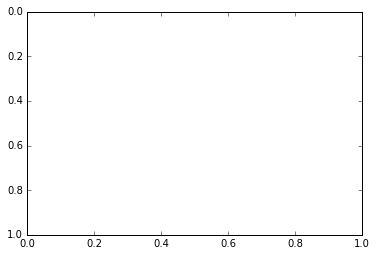

In [30]:
plot_learning_curve(clfcv, u"plot_learning_curve", X, y)

In [31]:
testnp = data_test.filter(regex='ages|SibSp|Parch|Fare_.*|Cabin|Embarked_.*|Sex|Pclass_.*|mname_.*|nname_.*|nTicket_.*')
test = testnp.as_matrix()

predictions = clfcv.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions_mycv1.csv", index=False)

In [32]:
from sklearn.externals import joblib
joblib.dump(clfcv,'clfcv1.pck')


['clfcv1.pck']

# 5.模型融合(model ensemble)

好了，终于到这一步了，我们要祭出机器学习/数据挖掘上通常最后会用到的大杀器了。恩，模型融合。

『强迫症患者』打算继续喊喊口号…
>* 『模型融合(model ensemble)很重要！』
>* 『模型融合(model ensemble)很重要！』
>* 『模型融合(model ensemble)很重要！』
重要的事情说三遍，恩，噢啦。

先解释解释，一会儿再回到我们的问题上哈。
啥叫模型融合呢，我们还是举几个例子直观理解一下好了。

大家都看过知识问答的综艺节目中，求助现场观众时候，让观众投票，最高的答案作为自己的答案的形式吧，每个人都有一个判定结果，最后我们相信答案在大多数人手里。

再通俗一点举个例子。你和你班某数学大神关系好，每次作业都『模仿』他的，于是绝大多数情况下，他做对了，你也对了。突然某一天大神脑子犯糊涂，手一抖，写错了一个数，于是…恩，你也只能跟着错了。
我们再来看看另外一个场景，你和你班5个数学大神关系都很好，每次都把他们作业拿过来，对比一下，再『自己做』，那你想想，如果哪天某大神犯糊涂了，写错了，but另外四个写对了啊，那你肯定相信另外4人的是正确答案吧？

最简单的模型融合大概就是这么个意思，比如分类问题，当我们手头上有一堆在同一份数据集上训练得到的分类器(比如logistic regression，SVM，KNN，random forest，神经网络)，那我们让他们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。

bingo，问题就这么完美的解决了。

###### 模型融合可以比较好地缓解，训练过程中产生的过拟合问题，从而对于结果的准确度提升有一定的帮助。

话说回来，回到我们现在的问题。你看，我们现在只讲了logistic regression，如果我们还想用这个融合思想去提高我们的结果，我们该怎么做呢？

既然这个时候模型没得选，那咱们就在数据上动动手脚咯。大家想想，如果模型出现过拟合现在，一定是在我们的训练上出现拟合过度造成的对吧。

那我们干脆就不要用全部的训练集，
>*   ***每次取训练集的一个subset，做训练***
> *  *** 这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；***
>*   ***同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据***
>*   ***这样做一个融合，可能对最后的结果有一定 的帮助。对，这就是常用的Bagging。***\

我们用scikit-learn里面的Bagging来完成上面的思路，过程非常简单。代码如下：

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_clf = BaggingRegressor(clfcv, n_estimators=5, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions_mybag.csv", index=False)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)
plot_learning_curve(gnb, u"plot_learning_curve", X, y)

# 6.总结

文章稍微有点长，非常感谢各位耐心看到这里。
总结的部分，我就简短写几段，出现的话，很多在文中有对应的场景，大家有兴趣再回头看看。

对于任何的机器学习问题，不要一上来就追求尽善尽美，先用自己会的算法撸一个baseline的model出来，再进行后续的分析步骤，一步步提高。

在问题的结果过程中：

>*   ***『对数据的认识太重要了！』***『
>*   ***『数据中的特殊点/离群点的分析和处理太重要了！』***『
>*   ***『特征工程(feature engineering)太重要了！』***『
>*   *** 『模型融合(model ensemble)太重要了！』***『


<img title="" alt="机器学习解决问题的过程" src="http://7xo0y8.com1.z0.glb.clouddn.com/2_titanic/process.png?imageView/2/w/700/q/100">